In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#### Section A

1. Load the dataset `employee_data.csv` and display the first 5 rows.
2. Find the average salary for each department.
3. Using NumPy, calculate the standard deviation of employee salaries.
4. Add a new column "Seniority" based on:
   - Experience > 5 years → "Senior"
   - Otherwise → "Junior"
5. Find the employee(s) who joined the earliest

In [3]:
data = pd.read_csv('employee_data.csv')
data.head()

,EmployeeID,Department,Experience,Salary,JoiningYear
0,101,HR,1,35000,2015
1,102,Finance,5,55000,2018
2,103,IT,3,45000,2016
3,104,Marketing,7,65000,2012
4,105,Sales,2,40000,2019


In [19]:
# Average salary for each department
# data.groupby('Department')['Salary'].mean()

avg_salary_by_department = data.groupby('Department')['Salary'].mean()
avg_salary_by_department

Department
Finance      57500.0
HR           63000.0
IT           56750.0
Marketing    58750.0
Sales        63750.0
Name: Salary, dtype: float64

In [69]:
print(f"Standard deviation of employee salaries: {np.std(data['Salary'])}")
# np.std(data['Salary'])

Standard deviation of employee salaries: 18117.60193844649


In [31]:
# Addition of a new column "Seniority" using either np.where or lambda function
data['Seniority'] = np.where(data['Experience'] > 5, 'Senior', 'Junior')

data['Seniority'] = data['Experience'].apply(lambda x: 'Senior' if x > 5 else 'Junior')

In [14]:
# Employees(s) who joined the earliest, i.e, experience is minimum
data['Experience'].min()
data[data['Experience'] == data['Experience'].min()]


,EmployeeID,Department,Experience,Salary,JoiningYear,Seniority,_Seniority
0,101,HR,1,35000,2015,Junior,Junior
14,115,Sales,1,37000,2021,Junior,Junior


### Section B: Data Visualization (Matplotlib & Seaborn)
6. Plot the distribution of salaries across all employees.
7. Create a bar chart of average salary by department.
8. Show the trend of salaries against joining year using a line plot.
9. Draw a boxplot showing salary distribution across departments.
10. Using Seaborn, visualize the relationship between experience and salary (scatterplot).

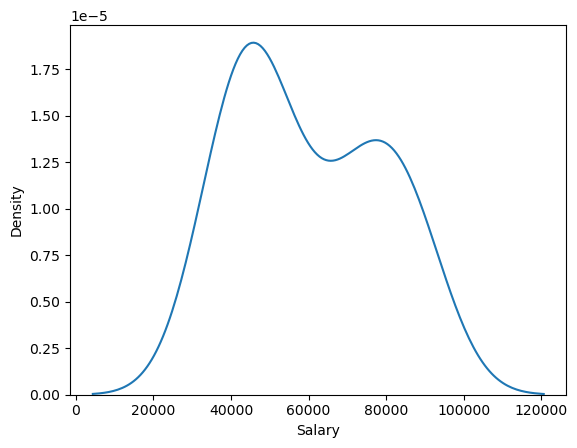

In [ ]:
# Salaries of all employees as kde plot, or normal distribution plot ??
sns.kdeplot(data['Salary'])
plt.show()

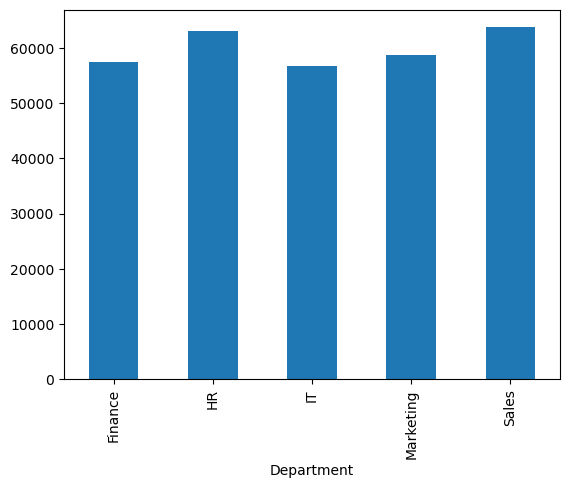

In [20]:
avg_salary_by_department.plot(kind = 'bar')
plt.show()

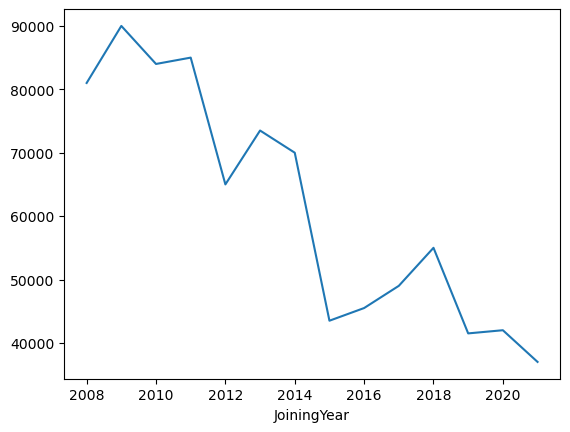

In [61]:
# Salaries against joining year
data.groupby('JoiningYear')['Salary'].mean().plot(kind = 'line')
plt.show()

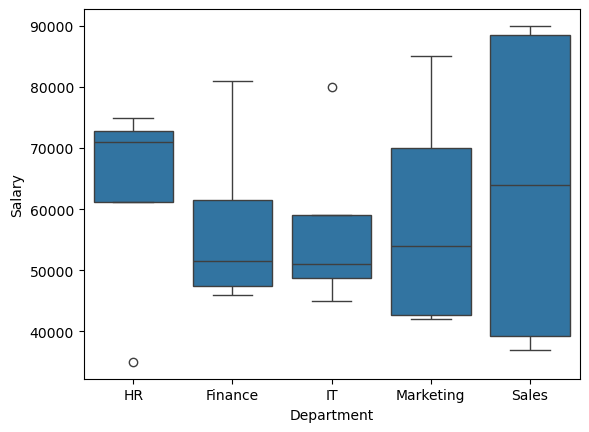

In [63]:
# Boxplot showing salary distribution across departments
sns.boxplot(x = 'Department', y = 'Salary', data = data)
plt.show()


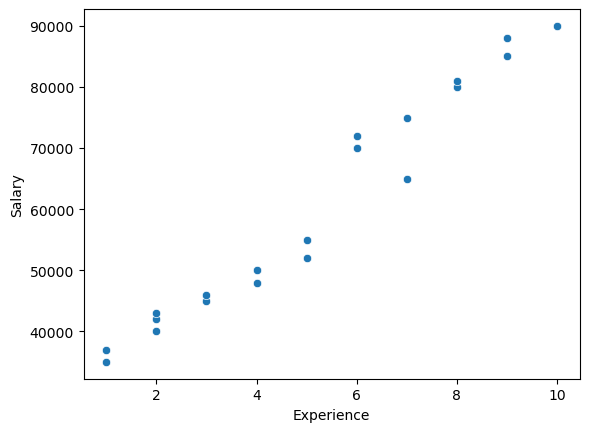

In [64]:
# Scatterplot showing relationship between experience and salary
sns.scatterplot(x = 'Experience', y = 'Salary', data = data)
plt.show()

### Section C: Advanced/Challenge Questions
11. Identify the department with the highest median salary.
12. Normalize the salary column (0 to 1 scaling) using NumPy.
13. Plot a heatmap of the correlation matrix for all numerical features.
14. Find the top 3 highest-paid employees and plot their salaries in a pie chart.
15. Create a pivot table showing average salary per department grouped by Seniority.

In [55]:
median_salary_by_department = data.groupby('Department')['Salary'].median()

median_salary_by_department.loc[median_salary_by_department == median_salary_by_department.max()]

Department
HR    71000.0
Name: Salary, dtype: float64

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Scaled_Salary'] = scaler.fit_transform(data[['Salary']])
data[['Salary', 'Scaled_Salary']]

,Salary,Scaled_Salary
0,35000,0.000000
1,55000,0.363636
2,45000,0.181818
3,65000,0.545455
4,40000,0.090909
5,70000,0.636364
6,48000,0.236364
7,80000,0.818182
8,42000,0.127273
9,90000,1.000000


<Axes: >

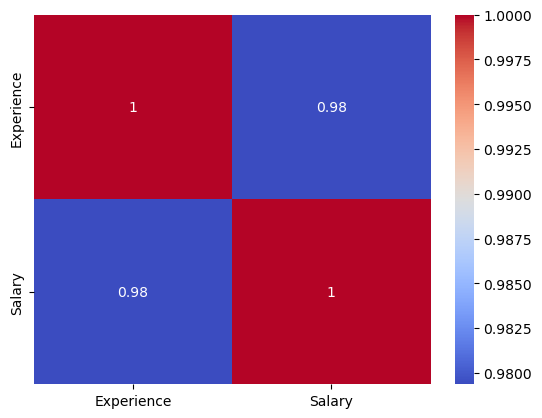

In [57]:
numerical_features = data.select_dtypes(include = [np.number]).columns

# numerical_features = numerical_features.drop(['EmployeeID','Scaled_Salary'])
# Dropping the JoiningYear as well, because experience is already present
numerical_features = numerical_features.drop(['EmployeeID','Scaled_Salary', 'JoiningYear'])
data[numerical_features].corr()

sns.heatmap(data[numerical_features].corr(), annot = True, cmap = 'coolwarm')

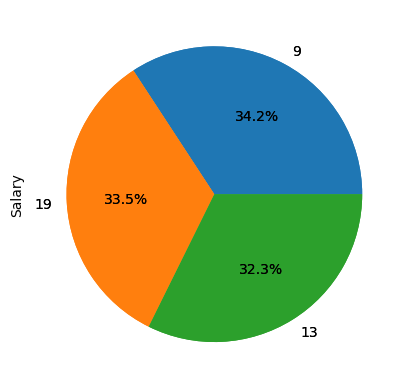

In [58]:
# Both the below methods will yield the same result
data['Salary'].sort_values(ascending = False).head(3).plot(kind = 'pie', autopct = '%1.1f%%')

data['Salary'].nlargest(3).plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

In [59]:
# pivot table showing average salary per department grouped by Seniority, for each department based on their Seniority
data.pivot_table(index = 'Department', columns = 'Seniority', values = 'Salary', aggfunc = 'mean')

Seniority,Junior,Senior
Department,,
Finance,49666.666667,81000.000000
HR,35000.000000,72333.333333
IT,49000.000000,80000.000000
Marketing,42500.000000,75000.000000
Sales,38500.000000,89000.000000
